In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Add the root directory to the path so we can import our modules
sys.path.append(os.path.abspath('..'))

from src.design import ExperimentDesigner
from src.simulator import DataSimulator
from src.analytics import ExperimentAnalyzer

# Set visual style
sns.set_theme(style="whitegrid")

# 1. Generate Data (Simulating a 2.5% lift)
baseline_cr = 0.12
n_required = 14500 # Approx based on 2% MDE
sim = DataSimulator(n=n_required, baseline_cr=baseline_cr)
df = sim.generate_experiment_data(actual_lift=0.025, latency_increase=8)

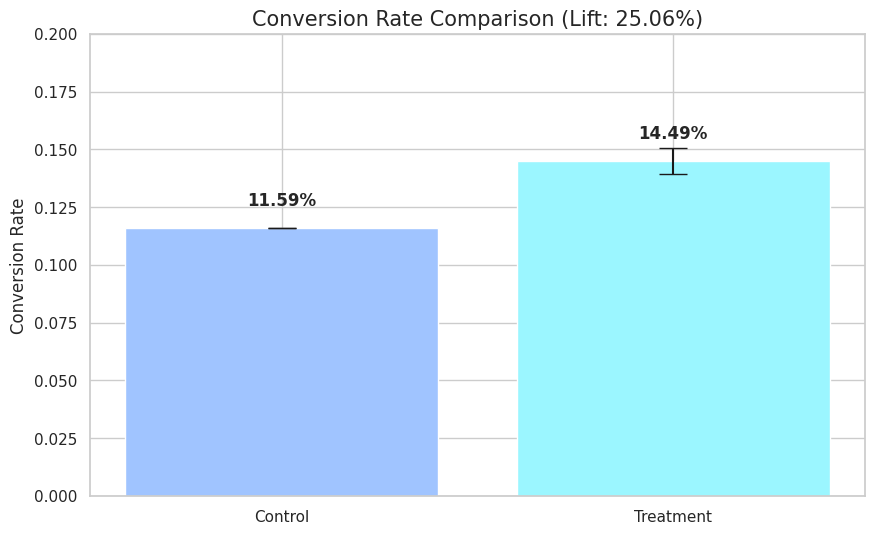

In [2]:
# 2. Analyze the data
analyzer = ExperimentAnalyzer(df)
results = analyzer.analyze_primary_metric()

# Create Plot
plt.figure(figsize=(10, 6))
means = [results['control_mean'], results['treatment_mean']]
labels = ['Control', 'Treatment']
ci_tr = results['ci_treatment']

# Plotting bar chart with error bars
bars = plt.bar(labels, means, color=['#A0C4FF', '#9BF6FF'], yerr=[0, (ci_tr[1]-ci_tr[0])/2], capsize=10)
plt.title(f"Conversion Rate Comparison (Lift: {results['lift']*100:.2f}%)", fontsize=15)
plt.ylabel("Conversion Rate")
plt.ylim(0, 0.20) # Adjust based on your CR

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2%}', ha='center', fontweight='bold')

plt.show()

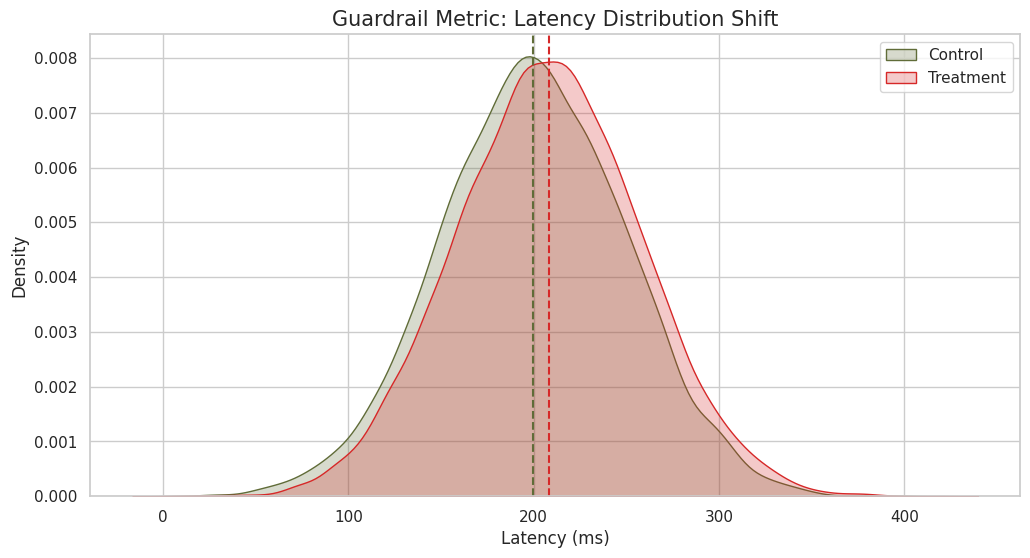

In [3]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=df[df['group'] == 'control'], x='latency_ms', fill=True, label='Control', color='#606C38')
sns.kdeplot(data=df[df['group'] == 'treatment'], x='latency_ms', fill=True, label='Treatment', color='#D62828')

plt.axvline(df[df['group'] == 'control']['latency_ms'].mean(), color='#606C38', linestyle='--')
plt.axvline(df[df['group'] == 'treatment']['latency_ms'].mean(), color='#D62828', linestyle='--')

plt.title("Guardrail Metric: Latency Distribution Shift", fontsize=15)
plt.xlabel("Latency (ms)")
plt.legend()
plt.show()